# Evaluación de la Efectividad del Modelo Entrenado: Arquitectura ResNet para Detección de Rostros

## Objetivo

El objetivo de este informe es evaluar la efectividad del modelo entrenado utilizando la arquitectura ResNet para la tarea de detección de rostros, basándonos en las métricas de pérdida (Loss) y el error cuadrático medio (RMSE) tanto en el conjunto de entrenamiento como en el de validación. La evaluación se centrará en la convergencia de estas métricas y en su comportamiento a lo largo de las épocas.

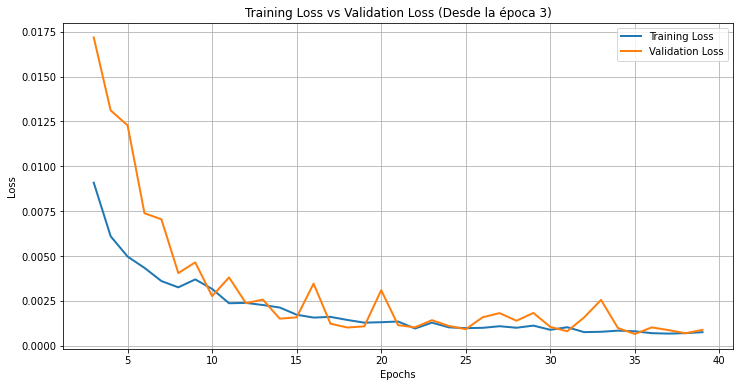

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'training_history_epoch40-Arq2-RetinaFace_early_preprocess.csv'
history = pd.read_csv(file_path)

# Definir un umbral para considerar los valores "cercanos"
threshold = 0.1

# Encontrar la primera época en que la diferencia es menor al umbral para loss y val_loss
start_epoch_loss = np.where(np.abs(history['loss'] - history['val_loss']) < threshold)[0][0]

# Encontrar la primera época en que la diferencia es menor al umbral para rmse y val_rmse
start_epoch_rmse = np.where(np.abs(history['root_mean_squared_error'] - history['val_root_mean_squared_error']) < threshold)[0][0]

# Seleccionar la época de inicio más grande para ambas métricas
start_epoch = max(start_epoch_loss, start_epoch_rmse)

# Graficar loss vs val_loss desde la época determinada
plt.figure(figsize=(12, 6))
plt.plot(history['loss'][start_epoch:], label='Training Loss', linewidth=2)
plt.plot(history['val_loss'][start_epoch:], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss (Desde la época %d)' % start_epoch)
plt.legend()
plt.grid(True)
plt.show()



### Pérdida (Loss) vs Pérdida de Validación (Val Loss)


- **Interpretación**: 
  - La gráfica muestra la evolución de la pérdida durante el entrenamiento y la validación desde la época en que ambas métricas comienzan a converger. 
  - Se observa que la pérdida de entrenamiento (Training Loss) disminuye constantemente a medida que avanzan las épocas, lo cual indica que el modelo está aprendiendo correctamente a partir de los datos de entrenamiento.
  - La pérdida de validación (Validation Loss) también disminuye, aunque con algunas fluctuaciones, lo que es común debido a la variabilidad inherente de los datos de validación.
  - La convergencia de ambas curvas sugiere que el modelo no está sobreajustando (overfitting) significativamente, ya que la pérdida de validación no se dispara, sino que sigue una tendencia similar a la de la pérdida de entrenamiento.

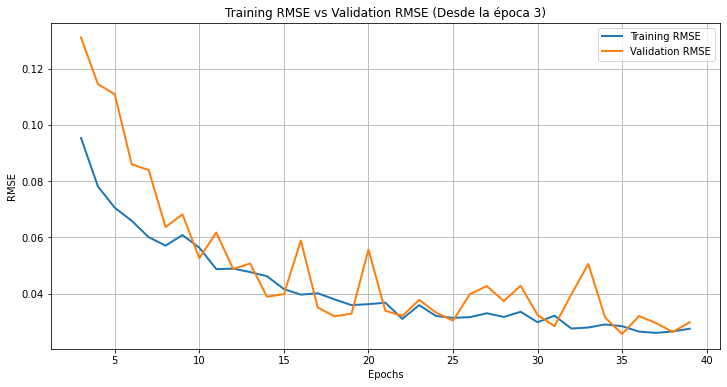

In [8]:
# Graficar root_mean_squared_error vs val_root_mean_squared_error desde la época determinada
plt.figure(figsize=(12, 6))
plt.plot(history['root_mean_squared_error'][start_epoch:], label='Training RMSE', linewidth=2)
plt.plot(history['val_root_mean_squared_error'][start_epoch:], label='Validation RMSE', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training RMSE vs Validation RMSE (Desde la época %d)' % start_epoch)
plt.legend()
plt.grid(True)
plt.show()

### Error Cuadrático Medio (RMSE) vs RMSE de Validación (Val RMSE)

- **Interpretación**: 
  - La gráfica muestra la evolución del error cuadrático medio (RMSE) durante el entrenamiento y la validación desde la época en que ambas métricas comienzan a converger.
  - Al igual que con la pérdida, el RMSE de entrenamiento (Training RMSE) muestra una tendencia decreciente, indicando que el modelo está reduciendo el error en las predicciones sobre los datos de entrenamiento.
  - El RMSE de validación (Validation RMSE) también disminuye, aunque con algunas variaciones. Este comportamiento es esperado y refleja cómo el modelo generaliza a datos no vistos.
  - La proximidad entre las curvas de RMSE de entrenamiento y validación sugiere que el modelo tiene un buen equilibrio entre sesgo y varianza, lo que es indicativo de un buen rendimiento general del modelo.

## Conclusión

Basado en las gráficas y la interpretación de las métricas de pérdida y RMSE, se puede concluir que el modelo entrenado con la arquitectura ResNet para la detección de rostros muestra una buena capacidad de aprendizaje y generalización. La convergencia de las métricas de entrenamiento y validación sugiere que el modelo no está sufriendo de sobreajuste severo y es efectivo en la tarea para la cual fue diseñado. Sin embargo, siempre es recomendable realizar más validaciones y pruebas con diferentes conjuntos de datos para confirmar estos hallazgos.

